In [46]:
# conda activate anndata

import numpy as np
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt

In [3]:
adata = ad.read_h5ad("data/janssens_2025_CellRanger_model_Condition/janssens_2025_CellRanger_counts_scVI_Condition.h5ad")

In [ ]:
sc.pp.neighbors(adata, use_rep="scVI")
sc.tl.umap(adata, min_dist=0.2)

In [11]:
adata.obs['Experimental_condition'] = adata.obs['Condition'].str.split(r" [0-9]").str[0]
print(adata.obs.value_counts("Experimental_condition"))

Experimental_condition
pIC-LNPs        27788
pIC alone       27226
CpG-LNPs        25598
eLNPs           21327
Steady state    14455
Name: count, dtype: int64


### Visualize cells from each condition alongside 'Steady state' cells

Starting CpG-LNPs


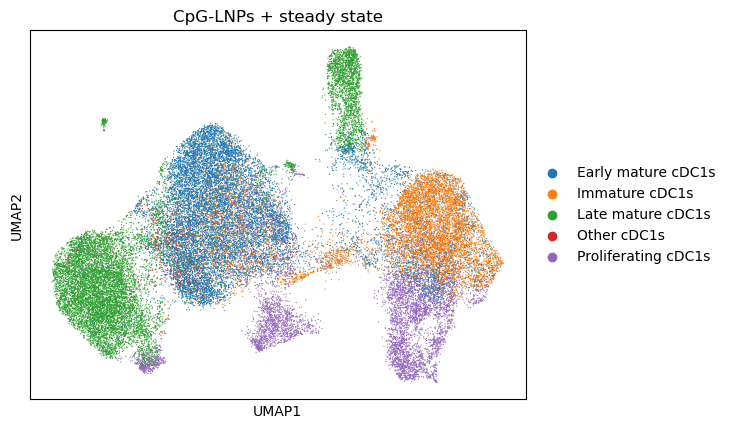

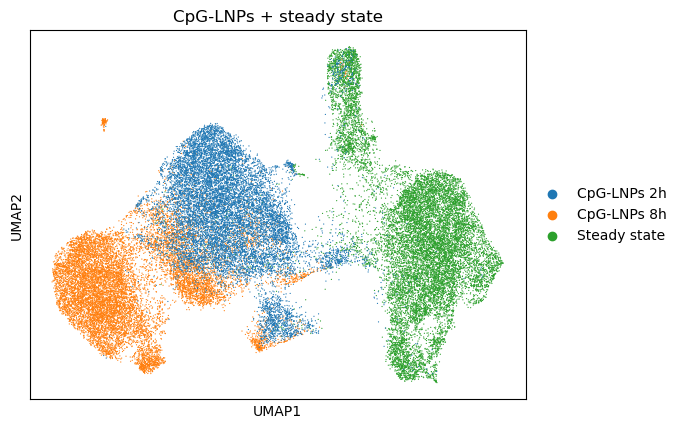

Starting eLNPs


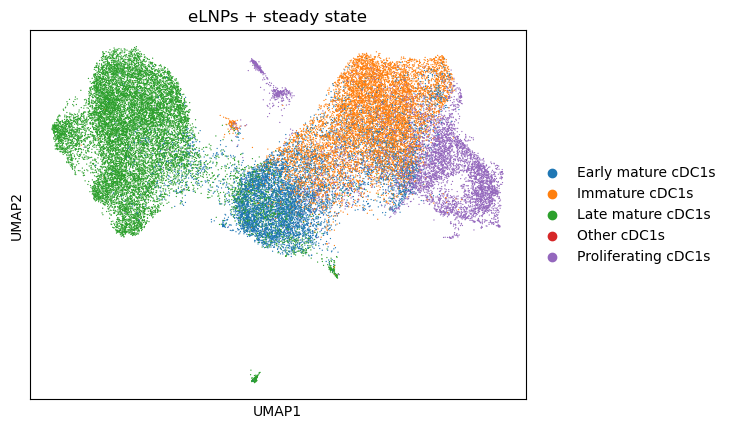

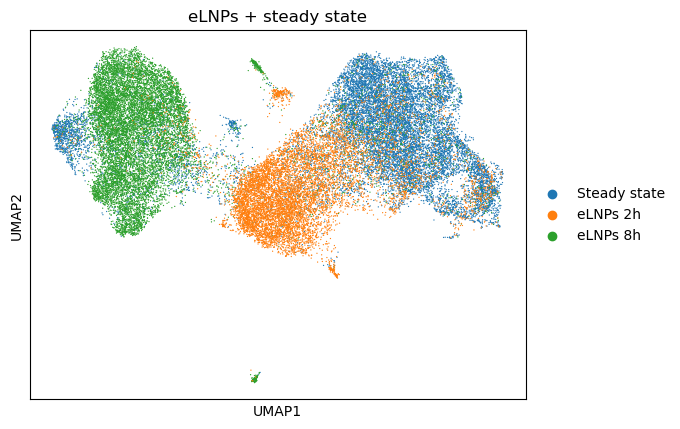

Starting pIC alone


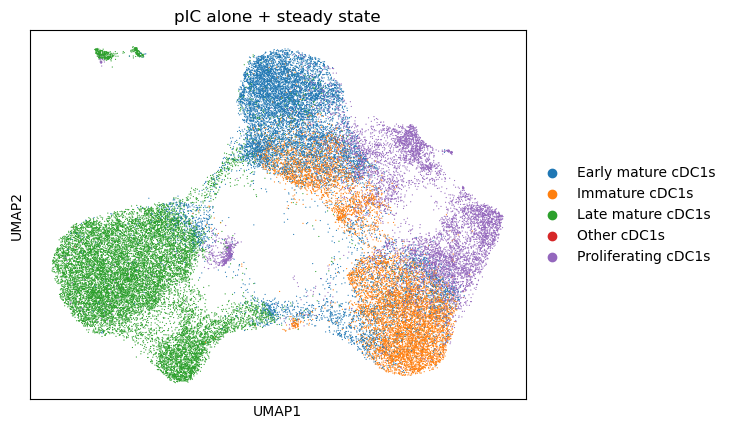

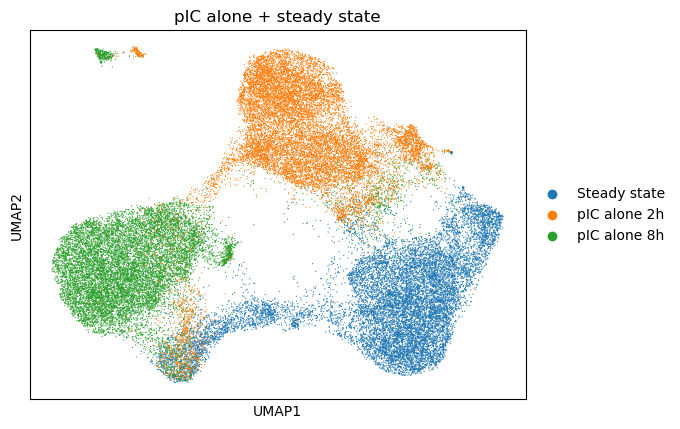

Starting pIC-LNPs


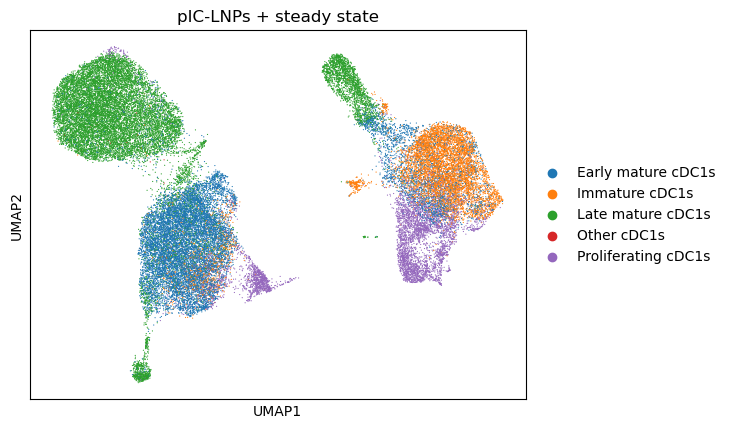

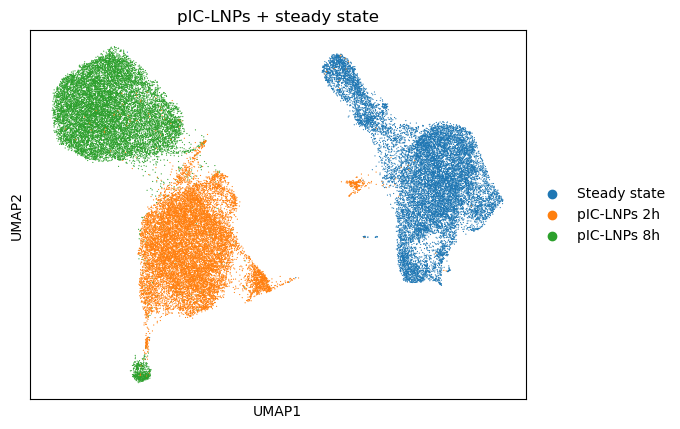

In [49]:
for cond in np.unique(adata.obs['Experimental_condition']):
    if cond == "Steady state":
        continue
    
    print(f"Starting {cond}")
    
    adata_subset = adata[adata.obs['Experimental_condition'].isin([cond, "Steady state"])].copy()
    sc.pp.neighbors(adata_subset, use_rep="scVI")
    sc.tl.umap(adata_subset, min_dist=0.2)
    sc.pl.umap(adata_subset, color=['newClustersTmp'], title=f"{cond} + steady state")
    sc.pl.umap(adata_subset, color=['Condition'], title=f"{cond} + steady state")

### Visualize cells from each condition

Starting CpG-LNPs


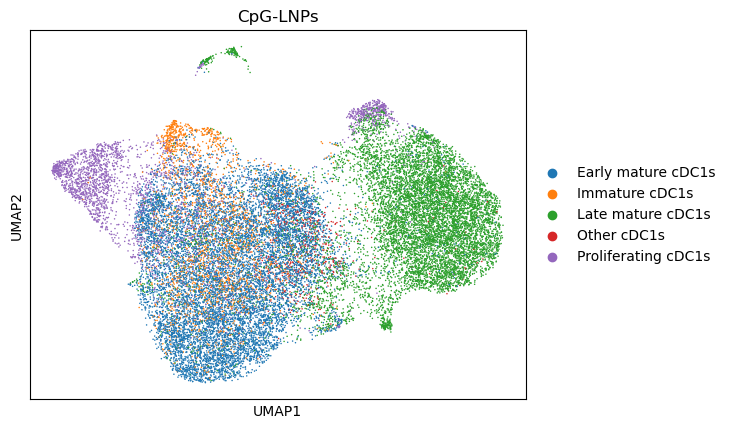

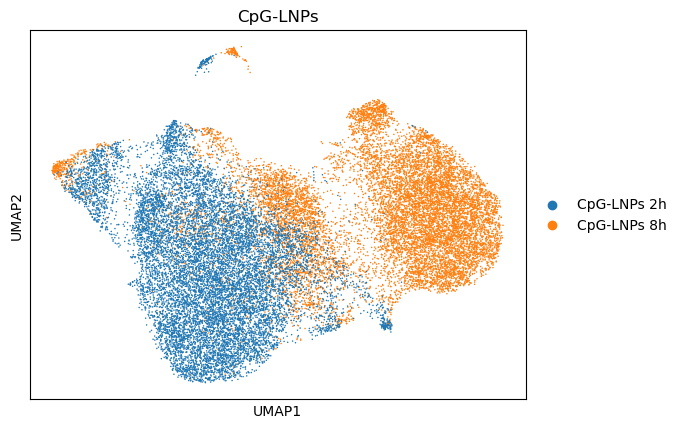

Starting Steady state


In [ ]:
for cond in np.unique(adata.obs['Experimental_condition']):
    print(f"Starting {cond}")
    
    adata_subset = adata[adata.obs['Experimental_condition'].isin([cond])].copy()
    sc.pp.neighbors(adata_subset, use_rep="scVI")
    sc.tl.umap(adata_subset, min_dist=0.2)
    sc.pl.umap(adata_subset, color=['newClustersTmp'], title=cond)
    sc.pl.umap(adata_subset, color=['Condition'], title=cond)